In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

df=pd.read_csv('heart.csv')


In [90]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [92]:
# view duplicate rows if any
new_df=df.duplicated().sum()
new_df

np.int64(0)

In [93]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


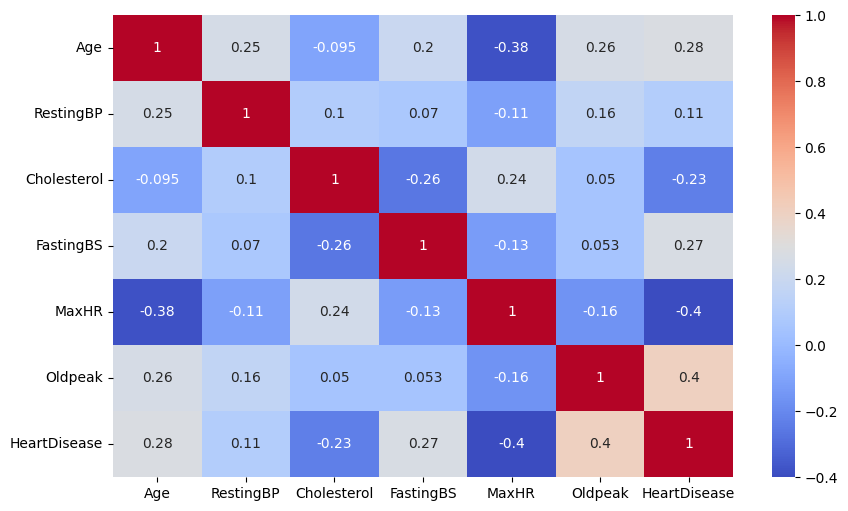

In [94]:
# corr heatmap


plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

<Axes: xlabel='ChestPainType', ylabel='HeartDisease'>

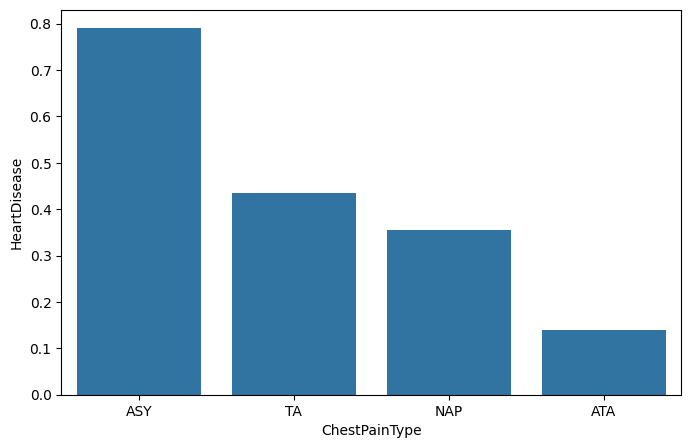

In [95]:
# groupby chestpain type vs target
plt.figure(figsize=(8,5))
plot_df=df[["ChestPainType","HeartDisease"]].groupby("ChestPainType").mean().sort_values(by="HeartDisease",ascending=False)
sns.barplot(x="ChestPainType", y="HeartDisease", data=plot_df)

<Axes: xlabel='RestingECG', ylabel='HeartDisease'>

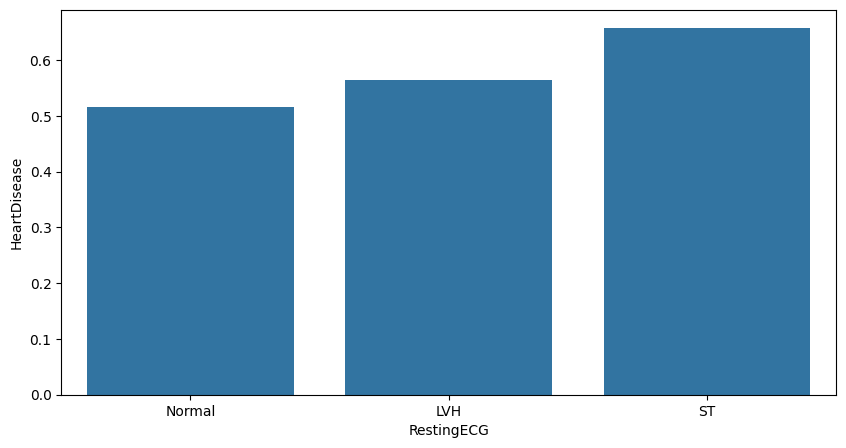

In [96]:
resting_df=df[["RestingECG","HeartDisease"]].groupby("RestingECG").mean().sort_values(by="HeartDisease")
plt.figure(figsize=(10,5))
sns.barplot(x="RestingECG",y="HeartDisease",data=resting_df)

<Axes: xlabel='ST_Slope', ylabel='HeartDisease'>

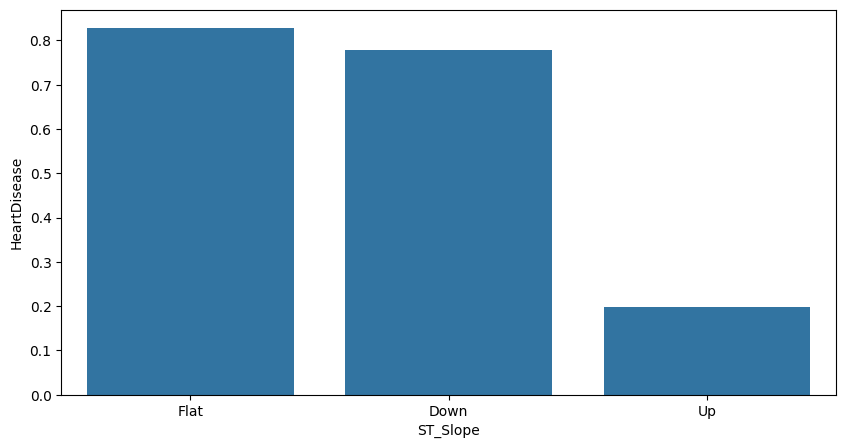

In [97]:
st_slope_df=df[["ST_Slope","HeartDisease"]].groupby("ST_Slope").mean().sort_values(by="HeartDisease",ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x="ST_Slope",y="HeartDisease",data=st_slope_df)

In [98]:
df["Age"].describe()

count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64

In [99]:
def age_group(age):
    if age<30:
        return "25-29"
    elif age<35:
        return "30-34"
    elif age<40:
        return "35-39"
    elif age<45:
        return "40-44"
    elif age<50:
        return "45-49"
    elif age<55:
        return "50-54"
    elif age<60:
        return "55-59"
    elif age<65:
        return "60-64"
    elif age<70:
        return "65-69"
    elif age<75:
        return "70-74"
    else:
        return "75+"

In [100]:
# df["new_df_age"]=df["Age"].apply(age_group)

# df["new_df_age"].value_counts()

<Axes: xlabel='Sex', ylabel='HeartDisease'>

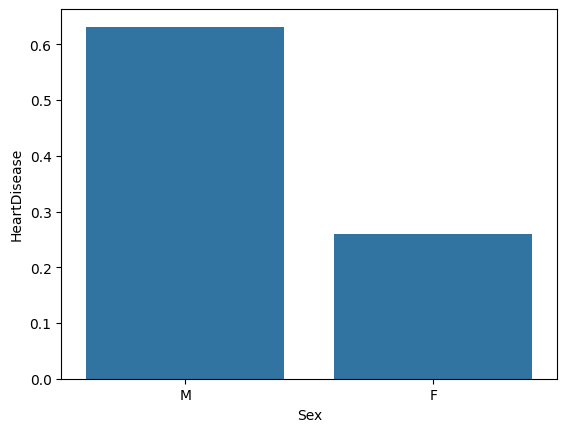

In [101]:
df["Sex"].value_counts()

df_age_plot=df[["Sex","HeartDisease"]].groupby("Sex").mean().sort_values(by="HeartDisease",ascending=False)
sns.barplot(x="Sex",y="HeartDisease",data=df_age_plot)

In [103]:
# one hot encoding for categorical columns
df=pd.get_dummies(df,drop_first=True).astype(int)
df.head()



,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0,0,1,0,1,0,1,0,0,0,1


In [104]:
# min max scaling

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(df)

df=pd.DataFrame(scaled_df,columns=df.columns)

df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.250,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.428571,0.80,0.298507,0.0,0.676056,0.375,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.183673,0.65,0.469320,0.0,0.267606,0.250,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0.408163,0.69,0.354892,0.0,0.338028,0.375,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,0.530612,0.75,0.323383,0.0,0.436620,0.250,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0


<Axes: >

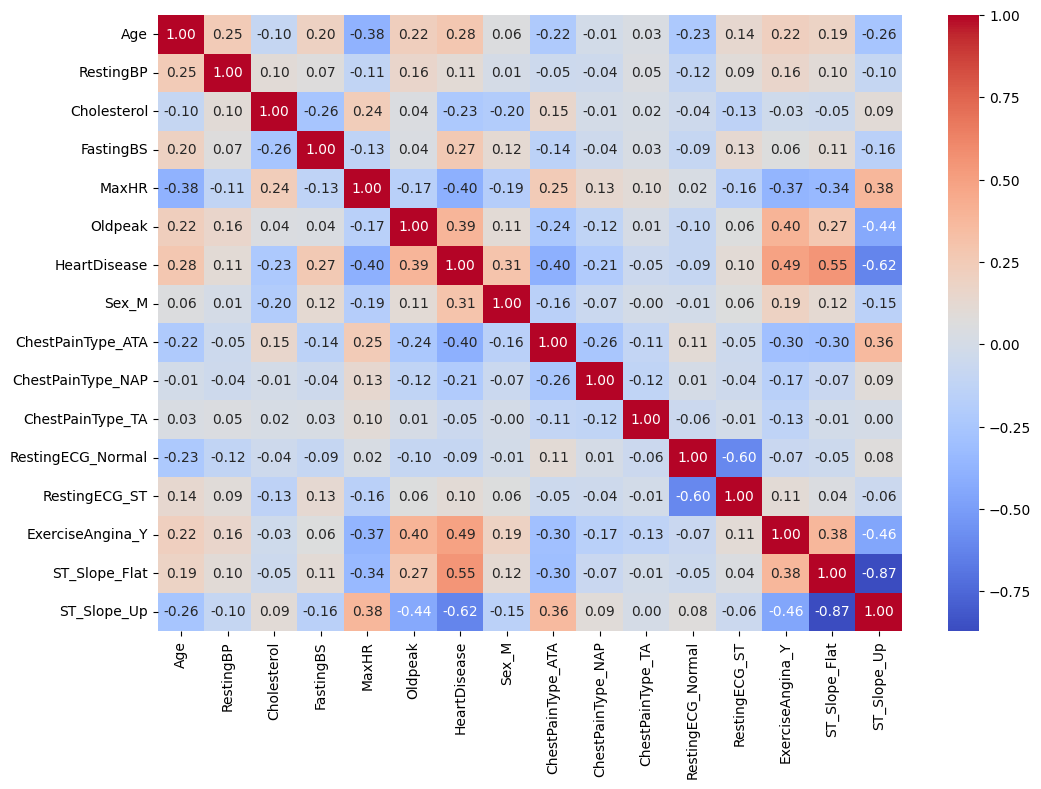

In [109]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',fmt='.2f')

In [110]:
X=df.drop(columns=["HeartDisease"])
y=df["HeartDisease"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

model=LogisticRegression()
model.fit(X_train,y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [111]:

y_pred=model.predict(X_test)
y_pred

array([1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.])

In [112]:
model.coef_

array([[ 0.84108764,  0.15739408, -1.54428135,  1.0073359 , -0.32478514,
         1.50468899,  1.29671665, -1.60381728, -1.36425918, -1.11141525,
        -0.38693655, -0.31008944,  0.89224625,  0.93650668, -1.43663602]])

In [113]:
model.intercept_

array([-0.52667862])

In [115]:
# evaluation metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_recall_fscore_support,precision_score,recall_score,f1_score,auc,roc_curve,roc_auc_score


accuracy=accuracy_score(y_test,y_pred)
confusion=confusion_matrix(y_test,y_pred)
classification=classification_report(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)
precision_recall=precision_recall_fscore_support(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score=auc(fpr, tpr)
print("Accuracy:",accuracy)
print("Confusion Matrix:\n",confusion)
print("Classification Report:\n",classification)
print("Precision:",precision)
print("Recall:",recall)
print("F1 Score:",f1)
print("ROC AUC Score:",roc_auc)
print("Precision-Recall:",precision_recall)
print("AUC Score:",auc_score)


Accuracy: 0.875
Confusion Matrix:
 [[71 14]
 [ 9 90]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.84      0.86        85
         1.0       0.87      0.91      0.89        99

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184

Precision: 0.8653846153846154
Recall: 0.9090909090909091
F1 Score: 0.8866995073891626
ROC AUC Score: 0.872192513368984
Precision-Recall: (array([0.8875    , 0.86538462]), array([0.83529412, 0.90909091]), array([0.86060606, 0.88669951]), array([85, 99]))
AUC Score: 0.872192513368984


(0.0, 1.0)

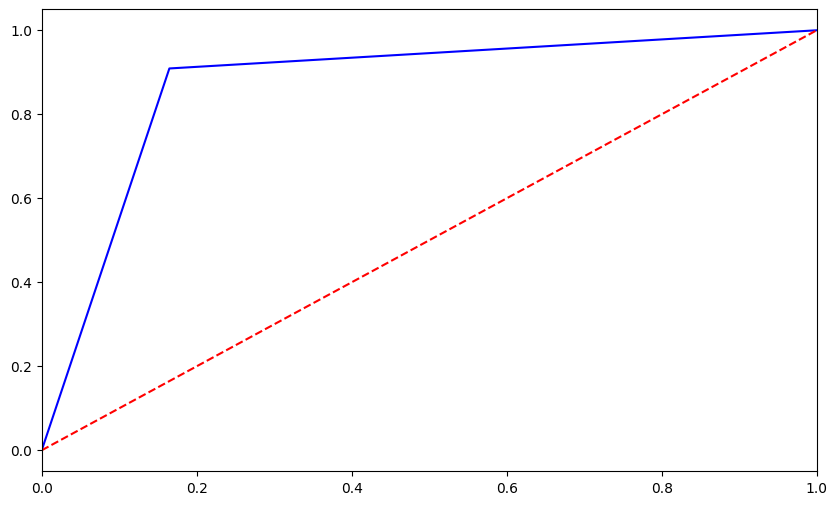

In [116]:
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])